https://github.com/influxdata/influxdb-python
    
pip3 install influxdb

My db setup as in https://home-assistant.io/blog/2017/04/25/influxdb-grafana-docker/

SQL queries https://docs.influxdata.com/influxdb/v1.3/query_language/data_exploration/#the-basic-select-statement

Follow https://github.com/influxdata/influxdb-python/blob/master/examples/tutorial_pandas.py

In [1]:
"""Tutorial for using pandas and the InfluxDB client."""

import argparse
import pandas as pd
%matplotlib inline

from influxdb import DataFrameClient

In [2]:
#host='localhost'
host='192.168.0.30'
port=8086   # port of InfluxDB http API

"""Instantiate the connection to the InfluxDB client."""
user = 'root'
password = 'root'
dbname = 'home_assistant'

client = DataFrameClient(host, port, user, password, dbname)

In [3]:
fields = """ * """
measurement = """ "°C" """
filters = """WHERE "value" < 18.5 """

In [4]:
# query = """SELECT * FROM "°C" WHERE "value" < 18.5"""
query = """SELECT {} FROM {} {} """.format(fields, measurement, filters)
print("Performing a query: {}".format(query))

Performing a query: SELECT  *  FROM  "°C"  WHERE "value" < 18.5  


In [5]:
response = client.query(query)

In [6]:
print(response)

{'°C':                                          attribution_str  count_sensors  \
2017-10-29 06:04:13.941410048+00:00  Powered by Dark Sky            NaN   
2017-10-29 06:04:29.987080192+00:00                 None            NaN   
2017-10-29 06:04:30.000286208+00:00                 None            NaN   
2017-10-29 06:04:30.382322176+00:00                 None            4.0   
2017-10-29 06:05:20.573617920+00:00                 None            NaN   
2017-10-29 06:05:20.587527936+00:00                 None            4.0   
2017-10-29 06:15:19.891108864+00:00                 None            NaN   
2017-10-29 06:15:50.893757952+00:00                 None            4.0   
2017-10-29 06:18:39.131664128+00:00  Powered by Dark Sky            NaN   
2017-10-29 06:19:44.877958912+00:00                 None            NaN   
2017-10-29 06:25:17.880882944+00:00                 None            NaN   
2017-10-29 06:33:03.213550080+00:00  Powered by Dark Sky            NaN   
2017-10-29 06:34:4

In [7]:
print(response.keys())

dict_keys(['°C'])


In [8]:
response_df = pd.DataFrame.from_dict(response['°C'])

In [9]:
response_df

,attribution_str,count_sensors,domain,entity_id,friendly_name,friendly_name_str,icon_str,max_value,mean,min_value,value
2017-10-29 06:04:13.941410048+00:00,Powered by Dark Sky,NaN,sensor,darksky_sensor_temperature,None,Outside temperature,mdi:thermometer,NaN,NaN,NaN,13.90
2017-10-29 06:04:29.987080192+00:00,None,NaN,sensor,bedroom_temperature,None,Bedroom temperature,None,NaN,NaN,NaN,18.33
2017-10-29 06:04:30.000286208+00:00,None,NaN,sensor,hall_temperature,None,Hall temperature,None,NaN,NaN,NaN,17.30
2017-10-29 06:04:30.382322176+00:00,None,4.0,sensor,mean_temperature,None,Mean temperature,mdi:calculator,19.12,18.44,17.30,18.44
2017-10-29 06:05:20.573617920+00:00,None,NaN,sensor,bedroom_temperature,None,Bedroom temperature,None,NaN,NaN,NaN,18.47
2017-10-29 06:05:20.587527936+00:00,None,4.0,sensor,mean_temperature,None,Mean temperature,mdi:calculator,19.12,18.47,17.30,18.47
2017-10-29 06:15:19.891108864+00:00,None,NaN,sensor,bedroom_temperature,None,Bedroom temperature,None,NaN,NaN,NaN,18.33
2017-10-29 06:15:50.893757952+00:00,None,4.0,sensor,mean_temperature,None,Mean temperature,mdi:calculator,19.26,18.47,17.30,18.47
2017-10-29 06:18:39.131664128+00:00,Powered by Dark Sky,NaN,sensor,darksky_sensor_temperature,None,Outside temperature,mdi:thermometer,NaN,NaN,NaN,13.80
2017-10-29 06:19:44.877958912+00:00,None,NaN,sensor,hall_temperature,None,Hall temperature,None,NaN,NaN,NaN,17.44


In [10]:
response_df.columns

Index(['attribution_str', 'count_sensors', 'domain', 'entity_id',
       'friendly_name', 'friendly_name_str', 'icon_str', 'max_value', 'mean',
       'min_value', 'value'],
      dtype='object')

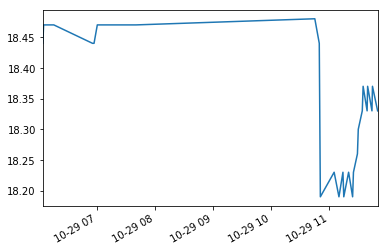

In [11]:
response_df[response_df['friendly_name_str'] == 'Mean temperature']['mean'].plot()